# 🔧 **<span style="color: DarkGreen; font-family:Times New Roman;">Binary Classification of Machine Failures</span>**

---


<div style="width:100%;height:0;padding-bottom:72%;position:relative;"><iframe src="https://giphy.com/embed/5QeJjaUixcEF2" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/looks-spark-faulty-5QeJjaUixcEF2">via GIPHY</a></p>

<span style="padding: 10px;
              color:white;font-size:200%;
           font-family:Time News Roman; color: DarkGreen">
🪔 Please Upvote My Kernel If You Liked It ⬆️
</span>

---

* * *
# 📖 <span style="color: DarkGreen; font-family:Times New Roman;">INTRODUCTION</span> <a name="introduction"></a>
---


# 🖌️ <span style="color: DarkGreen; font-family:Times New Roman;">Change the theme of the notebook</span><a name="appearance"></a>
---


In [1]:
# !wget http://bit.ly/3ZLyF82 -O appearance.css -q
    
# from IPython.core.display import HTML
# with open('./appearance.css', 'r') as file:
#     appearance = file.read()

# HTML(appearance)

* * *
# 🛠️ <span style="color: DarkGreen; font-family:Times New Roman;">Import important libraries, Read the data</span> <a name="iaiil"></a>
---


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV,KFold


2023-06-26 08:49:07.992698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 08:49:08.537384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-26 08:49:08.537405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-26 08:49:08.610064: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-26 08:49:10.132640: W tensorflow/stream_executor/platform/de

In [3]:
train = pd.read_csv("train.csv",index_col = "id")
test = pd.read_csv("test.csv",index_col = "id")

In [4]:
# Random State
RS = 13

# Folds Number
folds = 5


* * *
# 👁️ <span style="color: DarkGreen; font-family:Times New Roman;">Overview</span> <a name="overview"></a>
---


In [5]:
train.shape

(136429, 13)

In [6]:
train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
train.Type.unique()

array(['L', 'M', 'H'], dtype=object)

In [8]:
train.tail()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0
136428,L47937,L,296.9,308.1,1557,39.3,229,0,0,0,0,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.6+ MB


In [10]:
train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train.dtypes

Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
train.drop(["Product ID"], axis = 1, inplace = True)
test.drop(["Product ID"], axis = 1, inplace = True)

train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True)

* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">EDA</span> <a name="eda"></a>
---


* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Univariate Analysis</span> <a name="univariate-analysis"></a>
---


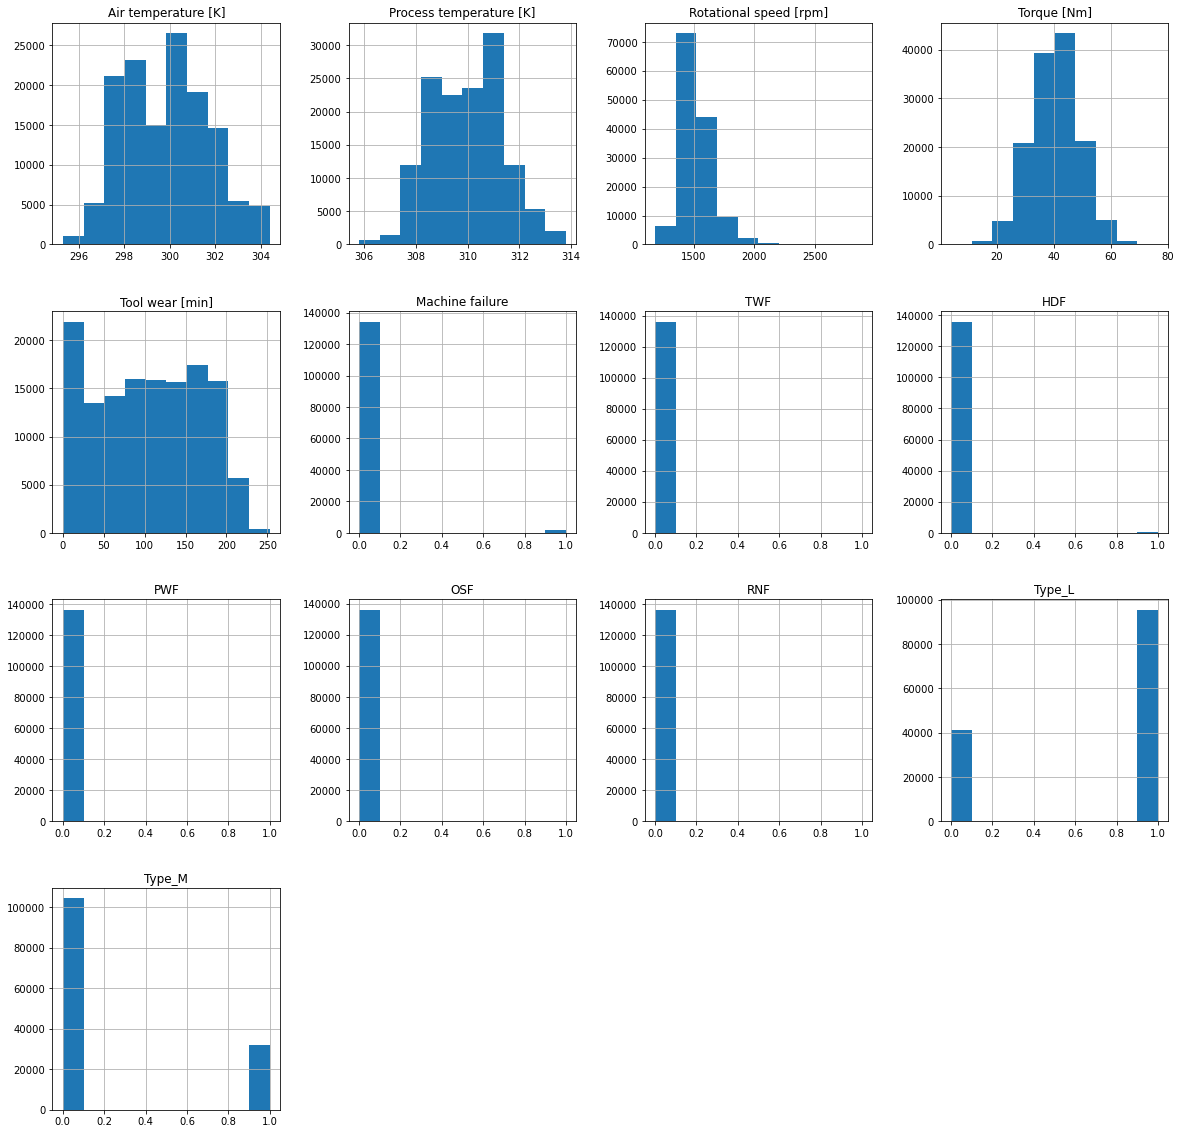

In [13]:
train.hist(figsize = (20,20))
plt.show()

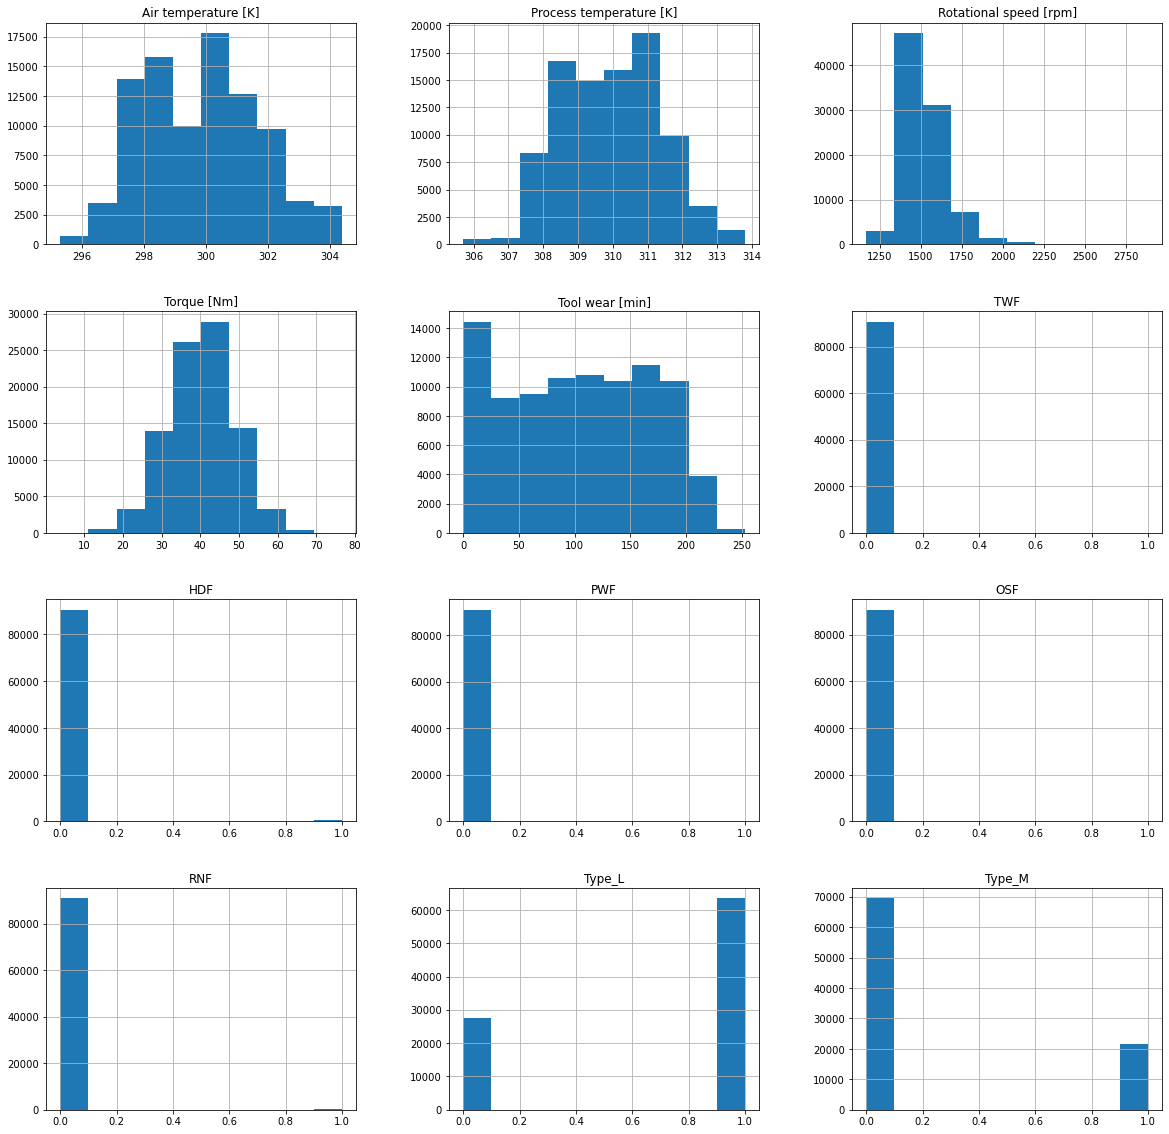

In [14]:
test.hist(figsize = (20,20))
plt.show()

* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Correlation Analysis</span> <a name="corr"></a>
---


In [15]:
train.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
Air temperature [K],1.000000,0.856080,0.016545,-0.006773,0.016994,0.067744,0.003826,0.100454,0.007967,0.007842,0.004815,-0.003894,0.010296
Process temperature [K],0.856080,1.000000,0.011263,-0.006298,0.012777,0.030966,0.004459,0.041454,0.003871,0.005337,0.004399,0.002116,0.001162
Rotational speed [rpm],0.016545,0.011263,1.000000,-0.779394,0.003983,-0.060868,-0.005765,-0.081996,0.053948,-0.061376,-0.003410,-0.000340,-0.001246
Torque [Nm],-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.145793,0.012983,0.100773,0.050289,0.108765,0.007986,0.000455,0.001082
Tool wear [min],0.016994,0.012777,0.003983,-0.003148,1.000000,0.056448,0.046470,0.011709,0.007624,0.063604,-0.002071,-0.007025,0.006289
Machine failure,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428,0.012028,-0.009603
TWF,0.003826,0.004459,-0.005765,0.012983,0.046470,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044,-0.002910,0.001771
HDF,0.100454,0.041454,-0.081996,0.100773,0.011709,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885,-0.003355,0.004842
PWF,0.007967,0.003871,0.053948,0.050289,0.007624,0.383941,0.039927,0.046680,1.000000,0.090016,0.000827,-0.001160,0.002803
OSF,0.007842,0.005337,-0.061376,0.108765,0.063604,0.494668,0.036041,0.067149,0.090016,1.000000,-0.000539,0.027886,-0.023726


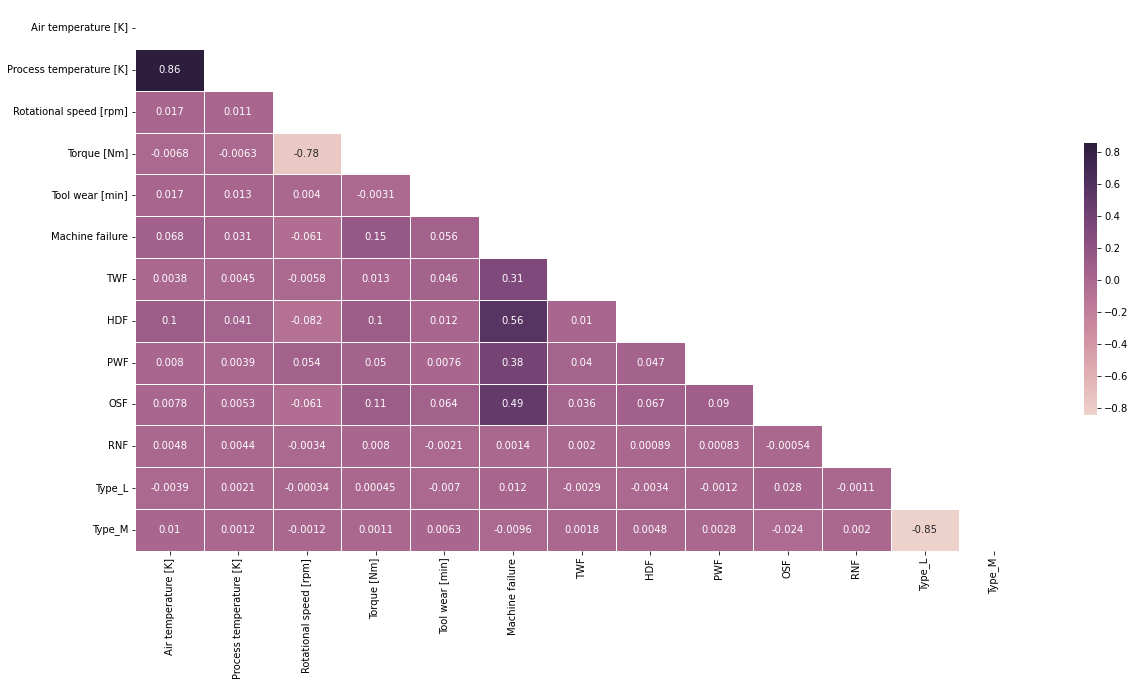

In [16]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(train.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(train.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [17]:
train.corr()["Machine failure"].sort_values(ascending = False)

Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Tool wear [min]            0.056448
Process temperature [K]    0.030966
Type_L                     0.012028
RNF                        0.001428
Type_M                    -0.009603
Rotational speed [rpm]    -0.060868
Name: Machine failure, dtype: float64

In [18]:
test.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
Air temperature [K],1.000000,0.855972,0.012901,-0.004892,0.018447,0.008893,0.103498,0.003869,0.012608,0.001752,-0.006797,0.007685
Process temperature [K],0.855972,1.000000,0.008324,-0.006220,0.014616,0.009710,0.043706,-0.002658,0.012992,0.006868,0.004260,-0.007286
Rotational speed [rpm],0.012901,0.008324,1.000000,-0.777272,0.008849,-0.009013,-0.087204,0.050574,-0.061990,-0.001525,-0.003683,-0.000619
Torque [Nm],-0.004892,-0.006220,-0.777272,1.000000,-0.004352,0.018059,0.103822,0.049382,0.109182,0.002807,0.007246,-0.003347
Tool wear [min],0.018447,0.014616,0.008849,-0.004352,1.000000,0.043164,0.002014,0.002967,0.066720,-0.002936,-0.000384,0.000017
TWF,0.008893,0.009710,-0.009013,0.018059,0.043164,1.000000,0.008981,0.033634,0.057624,0.004125,0.000336,0.000184
HDF,0.103498,0.043706,-0.087204,0.103822,0.002014,0.008981,1.000000,0.027568,0.053726,0.002759,0.001322,0.000330
PWF,0.003869,-0.002658,0.050574,0.049382,0.002967,0.033634,0.027568,1.000000,0.095655,0.002392,0.004812,-0.001958
OSF,0.012608,0.012992,-0.061990,0.109182,0.066720,0.057624,0.053726,0.095655,1.000000,-0.002998,0.027558,-0.023053
RNF,0.001752,0.006868,-0.001525,0.002807,-0.002936,0.004125,0.002759,0.002392,-0.002998,1.000000,0.001262,-0.003622


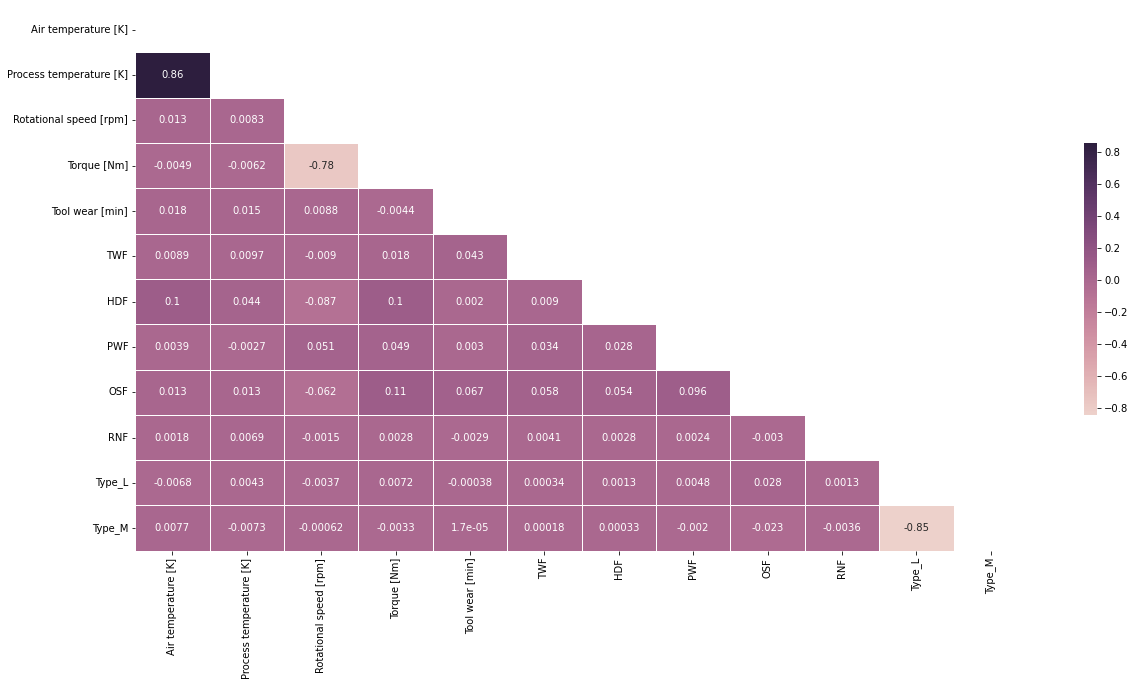

In [19]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(test.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(test.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Feature Engineering</span> <a name="feature-engineering"></a>
---


* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Dimensionality Reduction</span> <a name="dimensionality-reduction"></a>
---


* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Standardization</span> <a name="standardization"></a>
---


In [20]:
def scaling(feature):
    global X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit
    scaler.fit(X_train[feature].to_numpy().reshape(-1,1))
    X_train[feature] = scaler.transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = scaler.transform(X_test[feature].to_numpy().reshape(-1,1))

In [21]:
scale_needed_features = [ "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

* * *
# 🧑‍🔬 <span style="color: DarkGreen; font-family:Times New Roman;">Model Selection</span> <a name="model-selection"></a>
---


In [22]:
X = train.drop(["Machine failure"], axis = 1)
y = train[["Machine failure"]]


* * *
## 🧑‍🔬 <span style="color: DarkGreen; font-family:Times New Roman;">LogisticRegression</span> <a name="model-selection"></a>
---


In [23]:
lr_roc_auc_scores = []

kfold = KFold(n_splits = folds)

for train_index, test_index in kfold.split(X):
    X_train, y_train = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
    X_test, y_test = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
    for feature in scale_needed_features:
        scaling(feature)
    lr = LogisticRegression(random_state = RS)        
    lr.fit(X_train, y_train.values.ravel())
    lr_prediction = lr.predict(X_test)
    lr_roc_auc_scores.append(roc_auc_score(y_test,lr_prediction,average = "weighted" ))
    print(roc_auc_score(y_test,lr_prediction,average = "weighted" ))

0.8796569750741433
0.8808589793625873
0.8790375893955669
0.8806934199773233
0.8839231264464941



* * *
## 🧑‍🔬 <span style="color: DarkGreen; font-family:Times New Roman;">RandomForestClassifier</span> <a name="model-selection"></a>
---


In [24]:
rf_roc_auc_scores = []

kfold = KFold(n_splits = folds)

for train_index, test_index in kfold.split(X):
    X_train, y_train = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
    X_test, y_test = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
    for feature in scale_needed_features:
        scaling(feature)
    rf = RandomForestClassifier(random_state = RS)        
    rf.fit(X_train, y_train.values.ravel())
    rf_prediction = rf.predict(X_test)
    rf_roc_auc_scores.append(roc_auc_score(y_test,rf_prediction,average = "weighted" ))
    print(roc_auc_score(y_test,rf_prediction,average = "weighted" ))

0.9959858421550876
0.9955580693188801
0.9953084862033158
0.9967818475733289
0.9979452209632141


# Simple NN

In [25]:
def build_simple_nn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =(X_train.shape[1],), activation = "relu" ))
    model.add(tf.keras.layers.Dense(20, activation = "relu" ))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(20, activation = "relu" ))
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid" ))
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
    return model

In [26]:
# simple_nn_roc_auc_scores = []

# kfold = KFold(n_splits = folds)

# for train_index, test_index in kfold.split(X):
#     X_train, y_train = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
#     X_test, y_test = X.loc[train_index,:].copy(), y.loc[train_index,:].copy()
#     for feature in scale_needed_features:
#         scaling(feature)

#     simple_nn = build_simple_nn()
#     simple_nn.fit(X_train,y_train, epochs = 10, batch_size = 32, verbose = True)
#     simple_nn_prediction = simple_nn.predict(X_test)
#     simple_nn_prediction = np.where(simple_nn_prediction > 0.5, 1,0)
#     simple_nn_roc_auc_scores.append(roc_auc_score(y_test,simple_nn_prediction,average = "weighted" ))
#     print(roc_auc_score(y_test,simple_nn_prediction,average = "weighted" ))

* * *
# 🧫 <span style="color: DarkGreen; font-family:Times New Roman;">Final Evaluation</span> <a name="final-evaluation"></a>
---


In [27]:
X_train = train.drop(["Machine failure"], axis = 1)
y_train = train[["Machine failure"]]

X_test = test.copy()

for feature in scale_needed_features:
    scaling(feature)

simple_nn = build_simple_nn()
simple_nn.fit(X_train,y_train, epochs = 5, verbose = True)
simple_nn_prediction = simple_nn.predict(X_test)
simple_nn_final_prediction = np.where(simple_nn_prediction > 0.5, 1,0)

2023-06-26 08:50:22.057254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-26 08:50:22.057852: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-26 08:50:22.057971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amyrmahdy): /proc/driver/nvidia/version does not exist
2023-06-26 08:50:22.059770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
4264/4264 [==============================] - 6s 1ms/step - loss: 0.0359 - accuracy: 0.9942
Epoch 2/5
4264/4264 [==============================] - 6s 1ms/step - loss: 0.0244 - accuracy: 0.9962
Epoch 3/5
4264/4264 [==============================] - 6s 1ms/step - loss: 0.0232 - accuracy: 0.9962
Epoch 4/5
4264/4264 [==============================] - 6s 1ms/step - loss: 0.0230 - accuracy: 0.9962
Epoch 5/5
2843/2843 [==============================] - 2s 802us/step


* * *
# 📋 <span style="color: DarkGreen; font-family:Times New Roman;">Result</span> <a name="result"></a>
---


In [28]:
output_simple_nn = pd.DataFrame({
    "Machine failure" : np.squeeze(simple_nn_final_prediction)
}).set_index(X_test.index)
output_simple_nn.to_csv("output_simple_nn.csv")

In [29]:
output_simple_nn

,Machine failure
id,
136429,0
136430,0
136431,0
136432,0
136433,0
...,...
227378,0
227379,0
227380,0


In [30]:
# Author: amyrmahdy
# Date: 22 June 2023

* * *
# 📕 <span style="color: DarkGreen; font-family:Times New Roman;">CONCLUSION</span>  <a name="conclusion"></a>
---
